## Netflix Stock Profile Analysis

This Python notebook conducts an in-depth analysis and visualization of Netflix's stock data, serving as an investment analysis. 

The analysis is centered around Netflix's 2017 data, offering insights into stock price distribution, earnings, revenue, and a comparative assessment with the Dow Jones Industrial Average to gauge stock-related risks.

Data Sources: Yahoo Finance and Netflix.

## Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Examine the datasets

In [2]:
# Create and inspect the netflix_stocks dataframe

netflix_stocks = pd.read_csv("NFLX.csv")
print(netflix_stocks.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


In [3]:
# Create and inspect the dowjones_stocks dataframe

dowjones_stocks = pd.read_csv('DJI.csv')
print(dowjones_stocks.head())

         Date          Open          High           Low         Close  \
0  2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1  2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2  2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3  2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4  2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   

      Adj Close      Volume  
0  19864.089844  6482450000  
1  20812.240234  6185580000  
2  20663.220703  6941970000  
3  20940.509766  5392630000  
4  21008.650391  6613570000  


In [4]:
# Create and inspect the netflix_stocks_quarterly dataframe

netflix_stocks_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')
print(netflix_stocks_quarterly.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-03  124.959999  128.190002  124.309998  127.489998  127.489998   
1  2017-01-04  127.489998  130.169998  126.550003  129.410004  129.410004   
2  2017-01-05  129.220001  132.750000  128.899994  131.809998  131.809998   
3  2017-01-06  132.080002  133.880005  129.809998  131.070007  131.070007   
4  2017-01-09  131.479996  131.990005  129.889999  130.949997  130.949997   

     Volume Quarter  
0   9437900      Q1  
1   7843600      Q1  
2  10185500      Q1  
3  10657900      Q1  
4   5766900      Q1  


#### The data is represented by days. The netflix_stocks represents Netflix's daily stocks for a period of time while netflix_stocks_quarterly represents the quarterly price for a period of time.

### Rename Columns 

"Adj Close" is the adjusted close price adjusted for both dividends and splits, so this is the column with the true closing price.

In [5]:
# Change the Adj Close variable name in all datasets

netflix_stocks.rename(columns = {'Adj Close':'Price'}, inplace=True) 
dowjones_stocks.rename(columns = {'Adj Close':'Price'}, inplace=True)
netflix_stocks_quarterly.rename(columns = {'Adj Close':'Price'}, inplace=True) 

## Visualize Quarterly Data

To understand the distribution and flucutations of the Netflix quarterly stock prices for 2017.

Text(0.5, 0, 'Business Quarters in 2017')

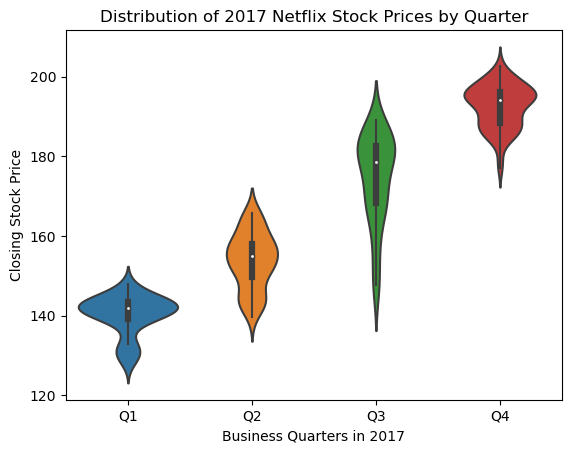

In [6]:
# A violinplot from seaborn
ax = sns.violinplot(x='Quarter', y='Price', data=netflix_stocks_quarterly)

ax.set_title("Distribution of 2017 Netflix Stock Prices by Quarter")
ax.set_ylabel("Closing Stock Price")
ax.set_xlabel("Business Quarters in 2017")

#### The symmetric violin plots suggest a normal distribution of prices. The box plots within each violin reveal that stock prices increased each quarter. Some quarters, like Q1, displayed wider shaded areas, indicating lower variability or changes in prices, while others, like Q3, had narrower shaded areas, signifying higher variability or changes in prices.

## Measure Performance of Earnings per Share

Earnings per share (EPS) from the estimate Yahoo projected for the quarter compared to the actual earnings for that quarter.

Text(0.5, 1.0, 'Earnings Per Share in Cents')

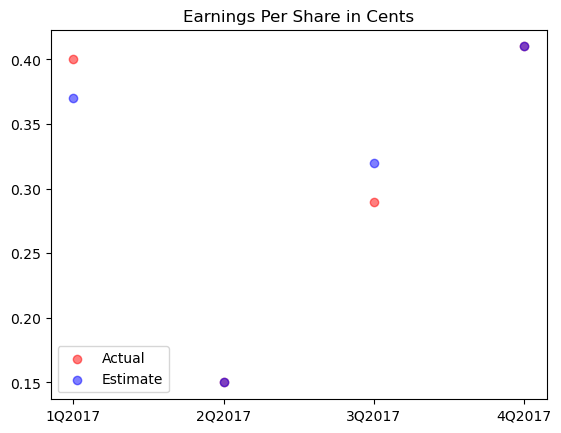

In [7]:
# Set distinct values to seperate quarters 
x_positions = [1, 2, 3, 4]

# Label each of the quarters
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]

# Actual earnings per share
earnings_actual =[.4, .15, .29, .41]

# Estimated projected earnings per share
earnings_estimate = [.37, .15, .32, .41]

# Create scatter plot of actual earnings & estimated earnings by quarter
fig, ax = plt.subplots()
plt.scatter(x_positions, earnings_actual, color='red', alpha=0.5)
plt.scatter(x_positions, earnings_estimate, color='blue', alpha=0.5)
plt.legend(["Actual", "Estimate"])
plt.xticks(x_positions, chart_labels)
plt.title('Earnings Per Share in Cents')

#### The purple dots, which represent a mixture of the red-blue color scheme, indicate that the actual and estimated earnings per share for those quarters are identical.

## Visualize Earnings and Revenue Side by Side

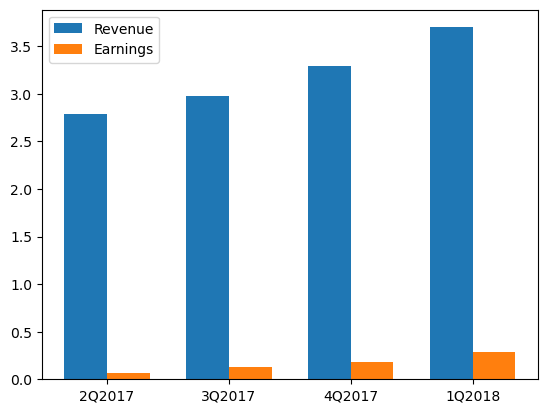

In [8]:
# Reported values from Netflix - in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]

# Quarter labels list
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Set an index for your plot using the length of the quarter labels.
indx = np.arange(len(quarter_labels))

bar_width = 0.35

# Create a subplot 
fig, ax = plt.subplots()
revenue_bar = ax.bar(indx - bar_width/2, revenue_by_quarter, bar_width, label='Revenue')
earnings_bar = ax.bar(indx + bar_width/2, earnings_by_quarter, bar_width, label='Earnings')

ax.set_xticks(indx)
ax.set_xticklabels(quarter_labels)

ax.legend()
plt.show()

#### Revenue and earnings showed a consistent increase in each quarter.

## Comparing to the Dow Jones Industrial Average

Comparing Netflix stock to the Dow Jones Industrial Average in 2017 (the market benchmark).

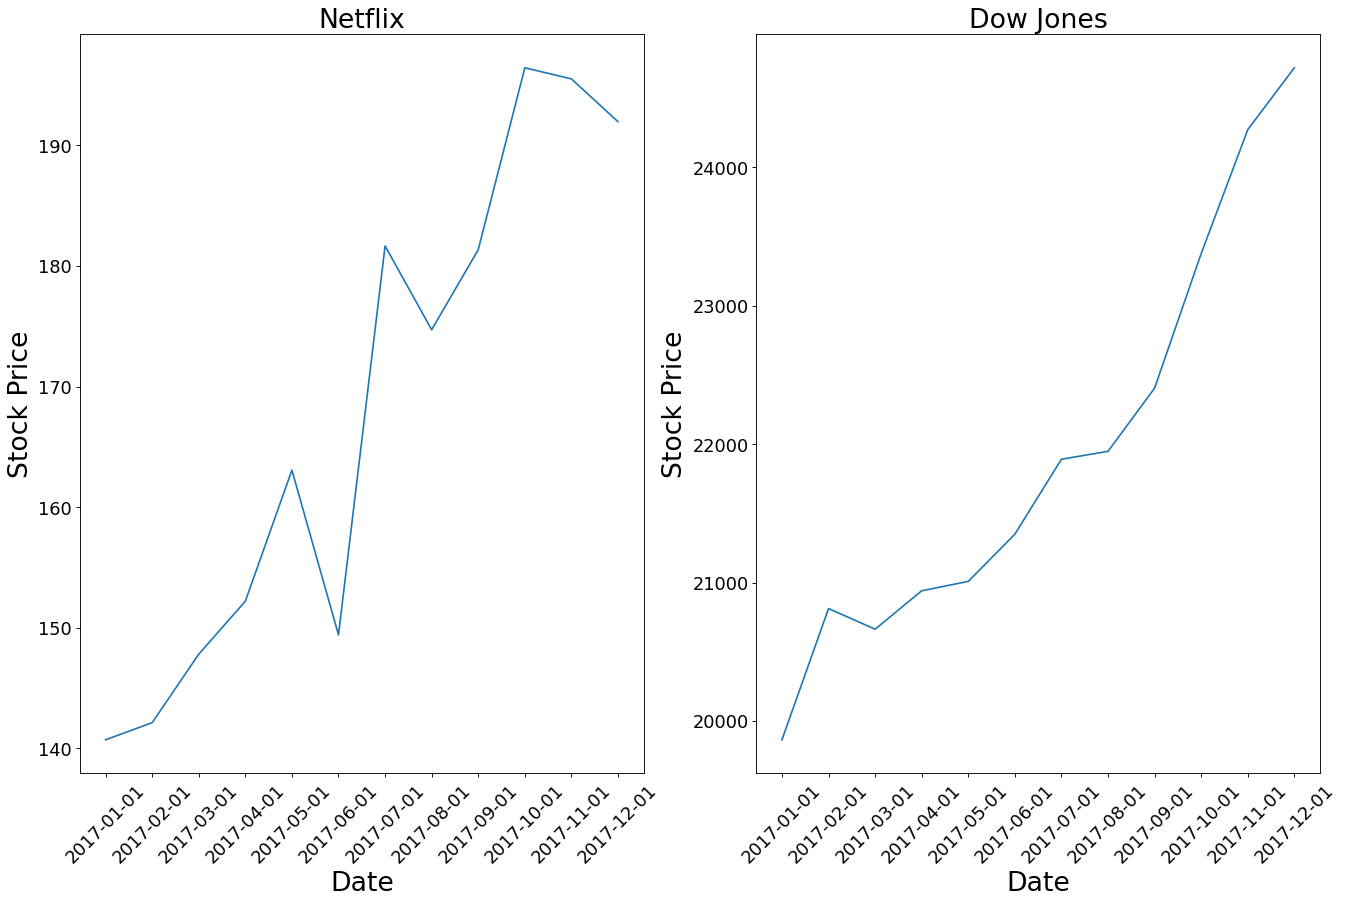

In [12]:
from matplotlib.pyplot import figure

figure(figsize=(20, 12), dpi=80)

# Left plot Netflix
ax1 = plt.subplot(1, 2, 1)
plt.plot(netflix_stocks['Date'], netflix_stocks['Price'])
plt.title("Netflix", fontsize=24)
plt.ylabel("Stock Price", fontsize=24)
plt.xlabel("Date", fontsize=24)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=45)

# Right plot Dow Jones
ax2 = plt.subplot(1, 2, 2)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'])
plt.title("Dow Jones", fontsize=24)
plt.ylabel("Stock Price", fontsize=24)
plt.xlabel("Date", fontsize=24)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=45)

#plt.tight_layout()
plt.show()

#### The Netflix stock price and DJI index both exhibited consistent growth over the year. Notably, between June and August, Netflix stock experienced a significant surge, surpassing the growth of the DJI index during that period. The peaks and troughs in Netflix's stock price underscore its inherent volatility as a single stock investment, contrasting with the DJI's stable and steady ascent. This contrast highlights the importance of diversification in managing investment risk.